In [1]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from plot_img import plot_img

In [2]:
file_names = os.listdir('C:/Users/ACER/workspace/1project/MRI')

train_image=[]
for im in file_names:
    img=image.load_img('C:/Users/ACER/workspace/1project/MRI/'+im,target_size=(96,96),color_mode='grayscale')
    img=image.img_to_array(img)
    img=img/255
    train_image.append(img)

clean_df=np.array(train_image)

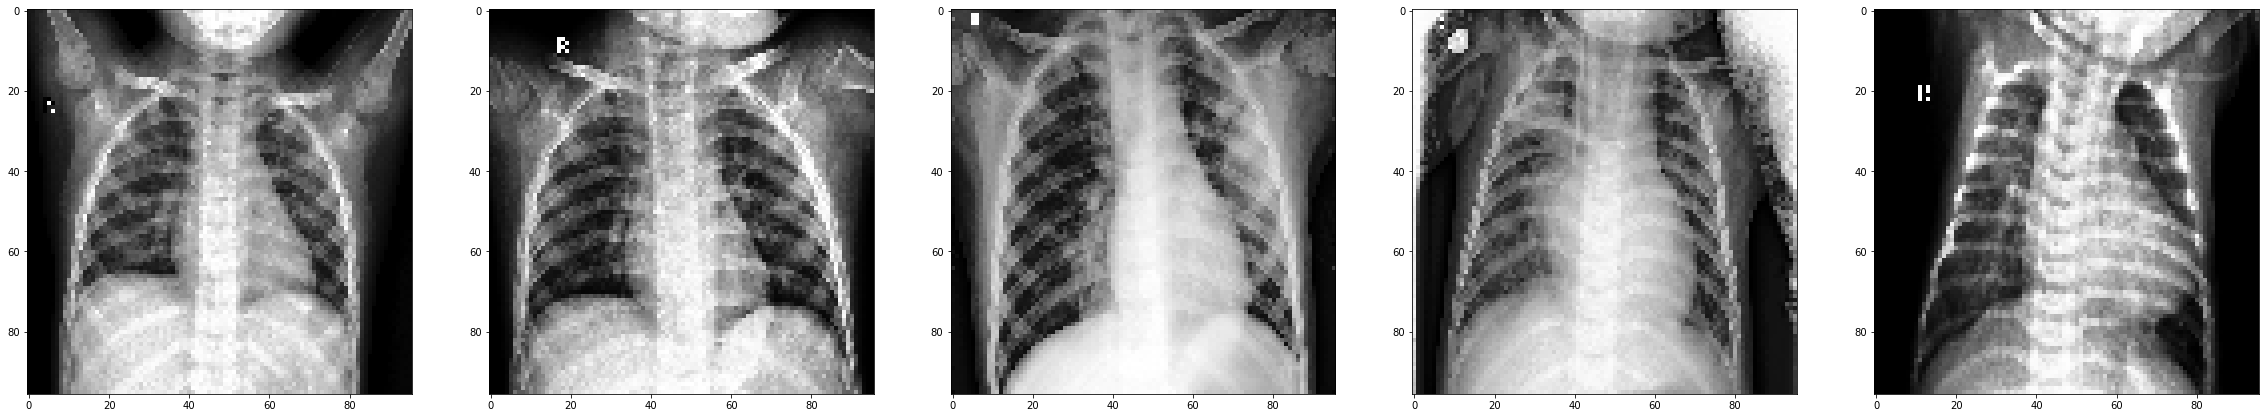

In [3]:
plot_img(clean_df)

In [4]:
from Noise import add_noise

noised_df=[]
for img in clean_df:
    noisy=add_noise(img)
    noised_df.append(noisy)

noised_df=np.array(noised_df)

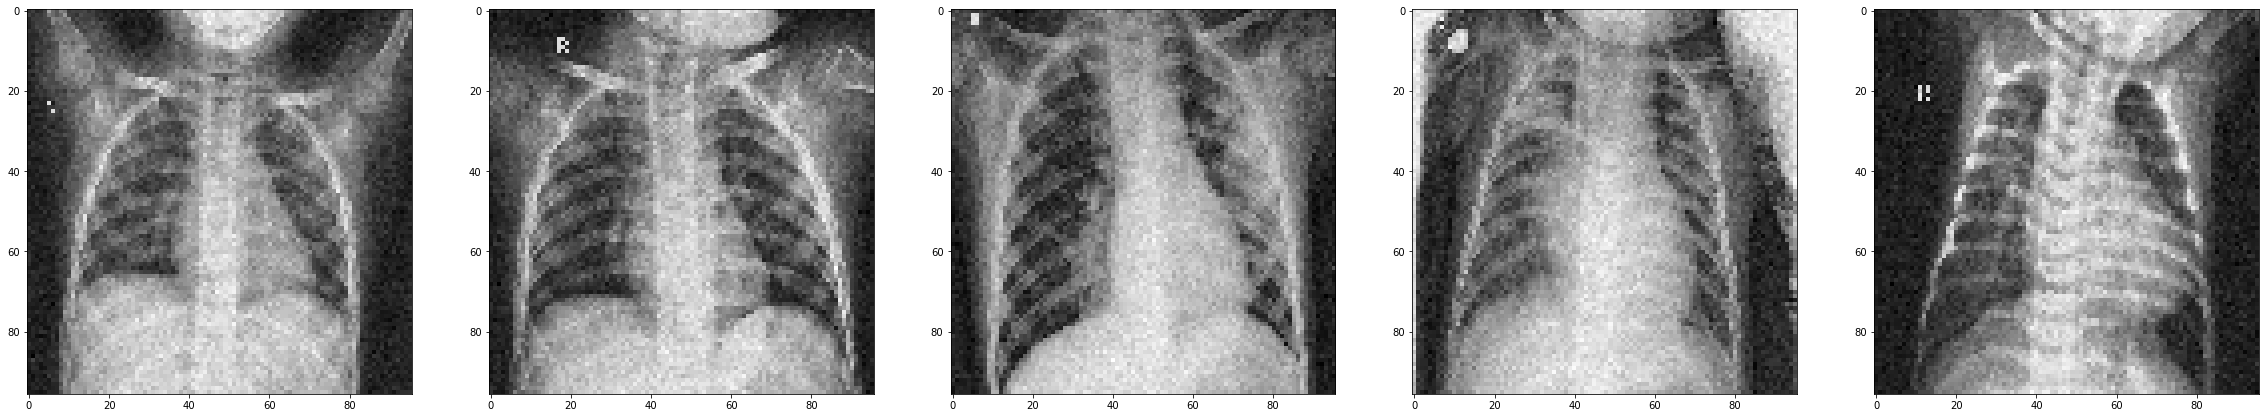

In [5]:
plot_img(noised_df)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_df, noised_df, test_size=0.20)

In [7]:
from autoencoder import autoencoder

model= autoencoder()

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(y_train, x_train, epochs=50, batch_size=10, validation_data=(y_test,x_test), callbacks=[early_stopping])

Epoch 1/50
11/11 [==============================] - 9s 783ms/step - loss: 0.6159 - val_loss: 0.5395
Epoch 2/50
11/11 [==============================] - 8s 691ms/step - loss: 0.5180 - val_loss: 0.5123
Epoch 3/50
11/11 [==============================] - 7s 679ms/step - loss: 0.5051 - val_loss: 0.5026
Epoch 4/50
11/11 [==============================] - 8s 693ms/step - loss: 0.4988 - val_loss: 0.4988
Epoch 5/50
11/11 [==============================] - 8s 717ms/step - loss: 0.4951 - val_loss: 0.4997
Epoch 6/50
11/11 [==============================] - 8s 718ms/step - loss: 0.4953 - val_loss: 0.4952
Epoch 7/50
11/11 [==============================] - 8s 756ms/step - loss: 0.4920 - val_loss: 0.4930
Epoch 8/50
11/11 [==============================] - 8s 760ms/step - loss: 0.4903 - val_loss: 0.4915
Epoch 9/50
11/11 [==============================] - 8s 720ms/step - loss: 0.4901 - val_loss: 0.4919
Epoch 10/50
11/11 [==============================] - 8s 714ms/step - loss: 0.4888 - val_loss: 0.4910

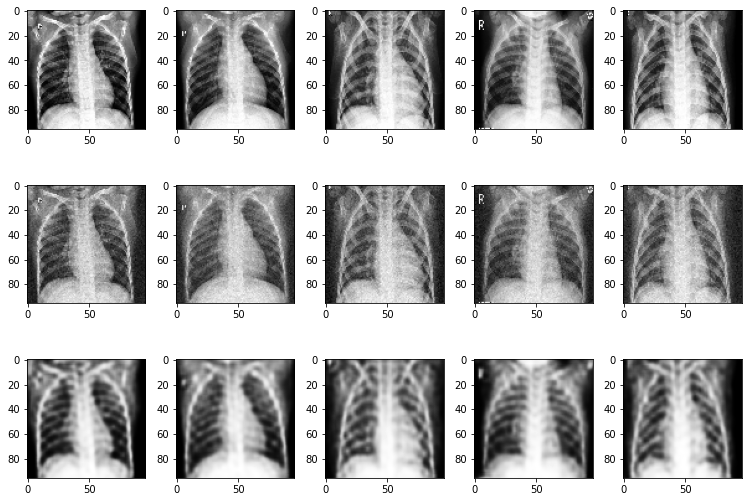

In [9]:
from predict import plot_predictions

pred= model.predict(y_test[:5])
plot_predictions(x_test[:5],y_test[:5], pred[:5])